In [2]:
import ROOT # always a good start

In [3]:
# Read the file
file = ROOT.TFile.Open("43718dea-5cd4-48a7-b73b-df168edf1fac.root")

# Show what it is inside
# file.ls()

# Get the TTree
t = file.Get('Events')

t.Print("Muon_*")



******************************************************************************
*Tree    :Events    : Events                                                 *
*Entries :   615920 : Total =      2839941670 bytes  File  Size =  489881559 *
*        :          : Tree compression factor =   5.80                       *
******************************************************************************
*Br    0 :Muon_dxy  : Float_t dxy (with sign) wrt first PV, in cm            *
*Entries :   615920 : Total  Size=    7015891 bytes  File Size  =    2931274 *
*Baskets :      141 : Basket Size=     111616 bytes  Compression=   2.39     *
*............................................................................*
*Br    1 :Muon_dxyErr : Float_t dxy uncertainty, in cm                       *
*Entries :   615920 : Total  Size=    7016310 bytes  File Size  =    1793013 *
*Baskets :      141 : Basket Size=     111616 bytes  Compression=   3.91     *
*...................................................

Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3001] Required argument not present

Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


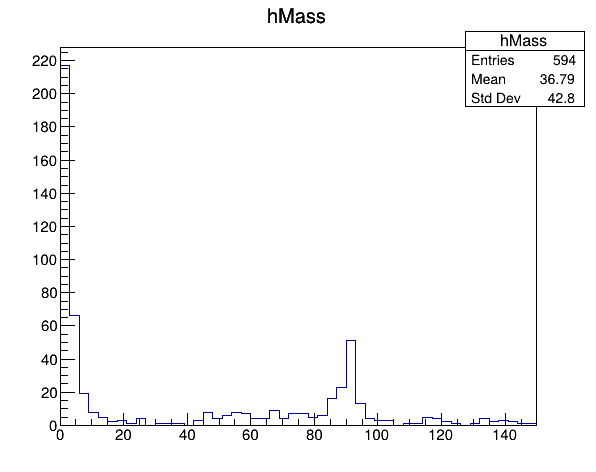

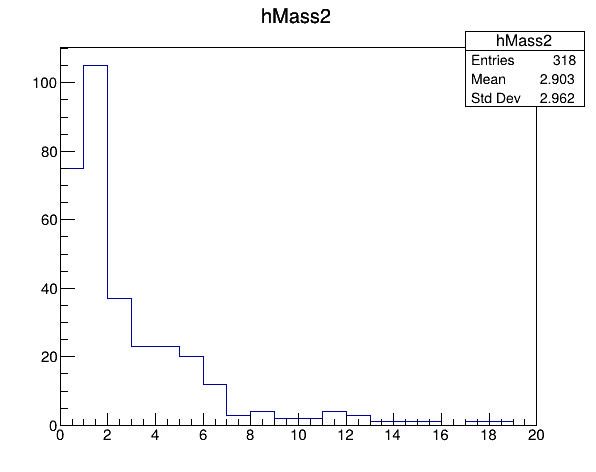

Info in <TCanvas::Print>: png file dimuon_masses.png has been created
Info in <TCanvas::Print>: png file dimuon_masses_0_20.png has been created


In [4]:
from itertools import combinations


hMass = ROOT.TH1F("hMass", "hMass", 50, 0, 150)
# make zoomed in hist from 0 to 20
hMass2 = ROOT.TH1F("hMass2", "hMass2", 20, 0, 20)

for e in range(0, 3000):
    t.GetEntry(e)
    nMuon = t.nMuon
    if nMuon < 2:
        continue
    
    # print("Event %i has %i muons"%(e, nMuon))
    muonpTs = list(t.Muon_pt)
    muonEtas = list(t.Muon_eta)
    muonPhis = list(t.Muon_phi)
    muonMs = list(t.Muon_mass)
    fourMomenta = []
    for i in range(nMuon):
        fourVec = ROOT.Math.PtEtaPhiMVector(muonpTs[i], muonEtas[i], muonPhis[i], muonMs[i])
        if fourVec.pt() > 20 and abs(fourVec.eta()) < 2.7:
            fourMomenta.append(fourVec)
        
    for pair in combinations(fourMomenta, 2):
        # print(pair[0], pair[1])
        p2 = pair[0] + pair[1]
        # print(p2)
        # print(p2.mass())
        hMass.Fill(p2.mass())
        if p2.mass() < 20:
            hMass2.Fill(p2.mass())
canvas = ROOT.TCanvas("canvas", "My first canvas", 600, 500) # 600 and 500 and width and height of the canvas
canvas.cd() # To indicate we are going to draw here
hMass.Draw()
canvas.SaveAs("dimuon_masses.png")
hMass2.Draw()
canvas.SaveAs("dimuon_masses_0_20.png")
from IPython.display import Image
display(Image(filename="dimuon_masses.png"), Image(filename="dimuon_masses_0_20.png"))

